In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_31_05_2022_20_15_30.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.tail(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
890,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_8,199,199,9,12.882296,3222,109,NaN,NaN,7.0,107.0,0.0,0.0,1.0,0,0,0.0
891,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,1,13.166977,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
892,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,2,13.119211,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
893,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,3,13.716940,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
894,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,4,13.046877,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
895,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,5,13.039180,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
896,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,6,13.017256,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
897,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,7,13.005616,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
898,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,8,12.936296,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0
899,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,183,183,9,13.035486,3234,111,NaN,NaN,8.0,109.0,0.0,0.0,1.0,0,0,0.0


In [5]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [6]:
evaluation_data['DISTRIBUTIONS'] = evaluation_data['Instance'].str.split('_').str[5]
evaluation_data['DISTRIBUTIONS']  = pd.to_numeric(evaluation_data['DISTRIBUTIONS'] )

In [7]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'DISTRIBUTIONS']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [8]:
grouped_multiple

,Algorithm,DISTRIBUTIONS,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,2,14.214169,2.569941,3264.0,357.0,113.0,12.0,0.0,0.000002,...,0.0,0.0,196.0,12.0,313.5,24.0,0.0,0.000000,7.0,2.0
1,QuantNaryTreeLearner,4,10.441836,2.448530,2731.5,342.0,88.0,17.0,0.0,0.000000,...,0.0,0.0,202.0,2.0,288.0,17.0,0.0,0.000000,5.0,1.0
2,QuantNaryTreeLearner,6,9.517888,1.308618,2589.0,153.0,81.5,10.0,0.0,0.000000,...,0.0,0.0,205.5,8.0,283.0,15.0,0.0,0.000000,5.0,0.0
3,QuantNaryTreeLearner,8,8.909790,1.884491,2458.5,255.0,80.5,10.0,0.0,0.000000,...,0.0,0.0,203.0,13.0,281.0,23.0,0.0,0.000000,4.0,1.0
4,QuantNaryTreeLearner,10,8.065341,1.792931,2299.5,132.0,73.0,10.0,0.0,0.000000,...,0.0,0.0,196.5,20.0,267.0,30.0,0.0,0.000000,4.0,0.0
5,WLStarLearner,2,20.133433,4.556487,7301.5,612.0,12.0,2.0,0.0,0.000011,...,0.0,0.0,196.0,12.0,7310.5,612.0,0.0,0.000001,NaN,NaN
6,WLStarLearner,4,20.351747,4.644937,4534.0,429.0,8.0,1.0,0.0,0.000000,...,0.0,0.0,202.0,2.0,4543.0,429.0,0.0,0.000000,NaN,NaN
7,WLStarLearner,6,23.058645,4.252948,3951.5,305.0,7.0,0.0,0.0,0.000000,...,0.0,0.0,205.0,8.0,3960.5,305.0,0.0,0.000000,NaN,NaN
8,WLStarLearner,8,24.320187,6.223237,3447.0,583.0,6.0,1.0,0.0,0.000000,...,0.0,0.0,203.0,13.0,3456.0,583.0,0.0,0.000000,NaN,NaN
9,WLStarLearner,10,19.836805,4.771443,3027.5,597.0,5.5,1.0,0.0,0.000000,...,0.0,0.0,196.5,20.0,3036.5,597.0,0.0,0.000000,NaN,NaN


In [9]:
len(grouped_multiple)

10

Text(0, 0.5, 'Learning Time Median (s)')

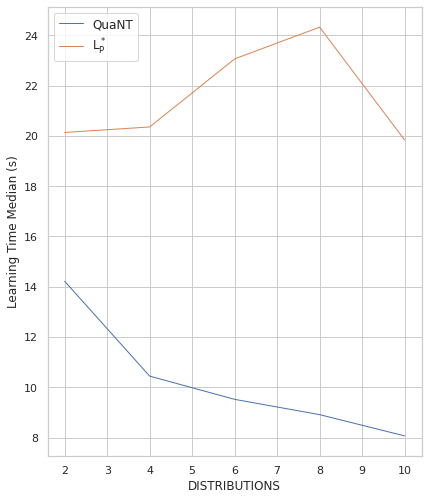

In [10]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

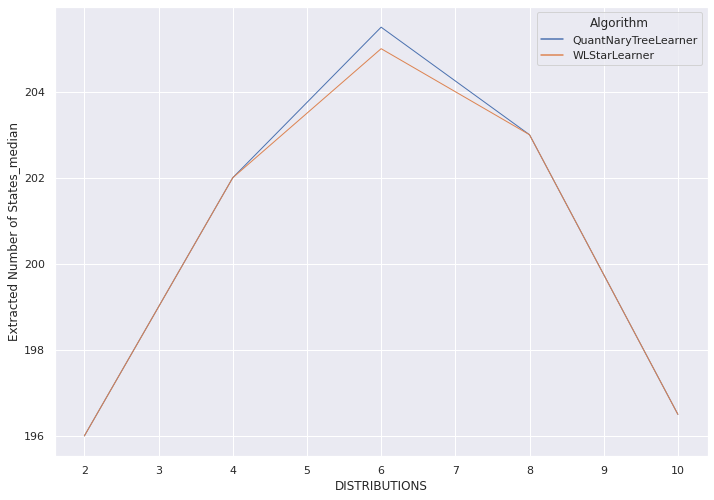

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="DISTRIBUTIONS", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

In [12]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:10])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][10:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['DISTRIBUTIONS'][0:10], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

ValueError: operands could not be broadcast together with shapes (0,) (10,) 

Text(0, 0.5, 'Structure Size Median')

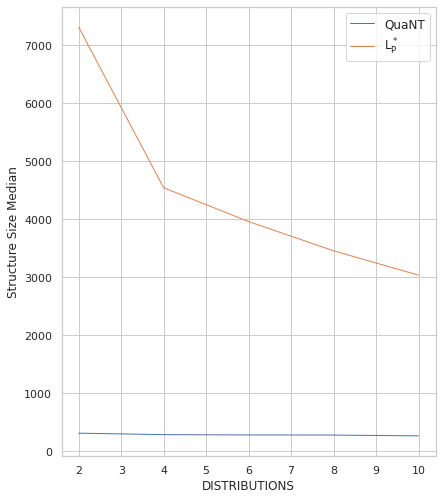

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [14]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE', 'DISTRIBUTIONS'],
      dtype='object')

In [15]:
evaluation_data_Quant['Tree Depth'].value_counts()

4.0     162
5.0     162
6.0      54
7.0      27
8.0      18
3.0       9
10.0      9
9.0       9
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

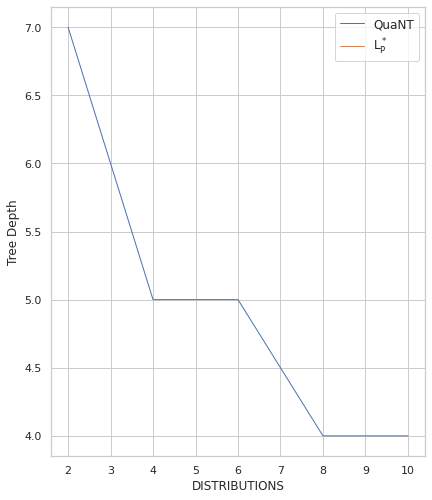

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)